# Import Libs

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Load Data

In [2]:
url='https://drive.google.com/file/d/1jtMzHje3LbjEA7gFDjp8Um-VcIR3jUbd/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,index_col=0)

# Exploratory Data Analysis (EDA)

In [3]:
# Checking the head of dataset (firt 5 rows)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking the tail of dataset (last 5 rows)
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# Checking the dataset format (number of rows and coluns)
df.shape

(150, 5)

In [ ]:
# checking features types
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# checking per null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# checking per duplicated rows
df.duplicated().sum()

3

In [ ]:
# dropping duplicates rows
df = df.drop_duplicates()

In [ ]:
# Checking the dataset format (number of rows and coluns)
df.shape

(147, 5)

In [ ]:
# Correlation analysis between features
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


In [ ]:
# Describe of dataframe
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Checking % of data of each Species
df['Species'].value_counts()/df.shape[0]

Iris-versicolor    0.340136
Iris-virginica     0.333333
Iris-setosa        0.326531
Name: Species, dtype: float64

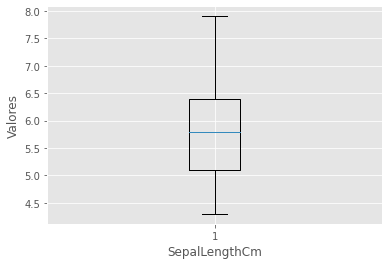

In [ ]:
plt.boxplot(df['SepalLengthCm'])
plt.ylabel('Valores')
plt.xlabel('SepalLengthCm')
plt.show()

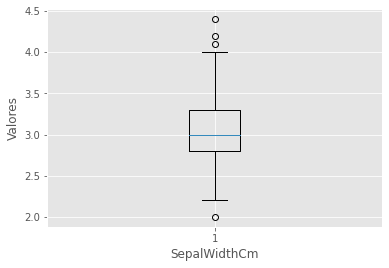

In [ ]:
plt.boxplot(df['SepalWidthCm'])
plt.ylabel('Valores')
plt.xlabel('SepalWidthCm')
plt.show()

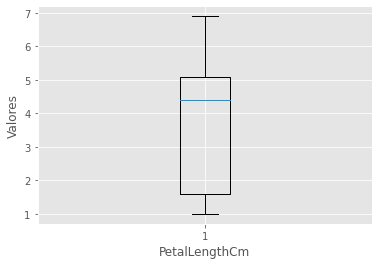

In [ ]:
plt.boxplot(df['PetalLengthCm'])
plt.ylabel('Valores')
plt.xlabel('PetalLengthCm')
plt.show()

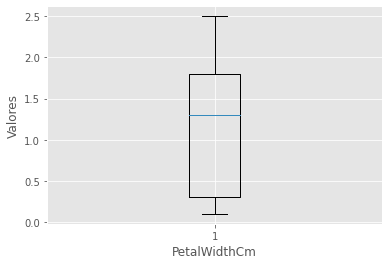

In [ ]:
plt.boxplot(df['PetalWidthCm'])
plt.ylabel('Valores')
plt.xlabel('PetalWidthCm')
plt.show()

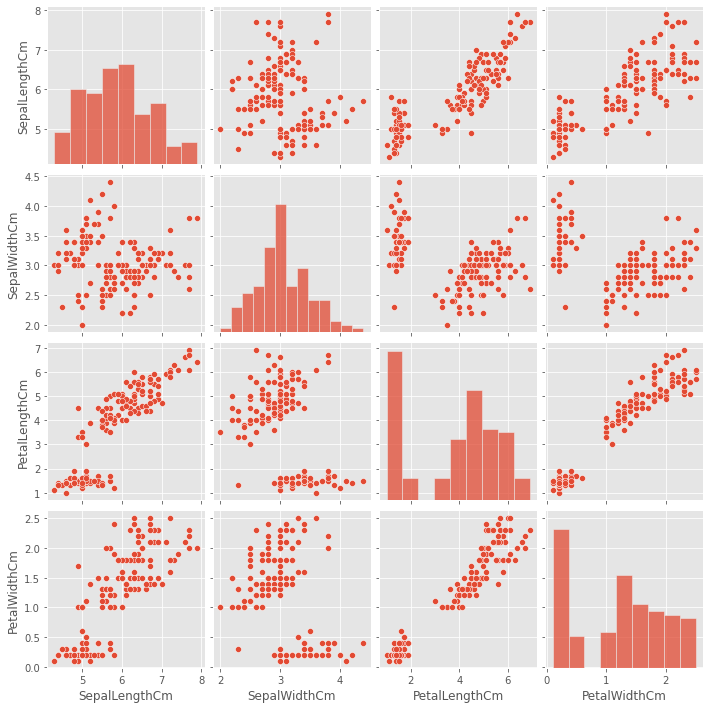

In [ ]:
# Ploting pairplot using seaborn lib
sns.pairplot(df)

# Label Transforme

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['Species'])

In [ ]:
# Analysing correlation between features and target
corr_with_target = df.corr()
corr_with_target.style.background_gradient(cmap='PuBu')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
target,0.782904,-0.418348,0.948339,0.955693,1.000000


In [ ]:
# counting rows by species and target to see the mapping between species and target
df.groupby(['Species','target']).count()

,,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,target,,,,
Iris-setosa,0,48,48,48,48
Iris-versicolor,1,50,50,50,50
Iris-virginica,2,49,49,49,49


# Training Model

In [23]:
# split dataframe between X and y
# X = df.drop(columns=['Species'])
X = df.iloc[:,3:4]
y = df['Species']

In [24]:
# Split data between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# instantiate the KNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [26]:
# training model
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [27]:
# predicting the teste data
y_pred = knn.predict(X_test)

# Model Evaluation 

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [29]:
# calc the model accurace
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  1.0


In [30]:
# calc the model precision
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: ',precision)

Precision:  1.0


In [31]:
# calc the model recall
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: ',recall)

Recall:  1.0


In [32]:
# calc the model accurace
f1 = f1_score(y_test, y_pred, average='macro')
print('F1-Score: ',f1)

F1-Score:  1.0
